In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn import datasets

from sklearn.neighbors import KNeighborsRegressor

1. Загрузите выборку Boston с помощью функции sklearn.datasets.load_boston(). Результатом вызова данной функции является объект, у которого признаки записаны в поле data, а целевой вектор — в поле target.

In [25]:
data = datasets.load_boston()

x = data.data
y = data.target

2. Приведите признаки в выборке к одному масштабу при помощи функции sklearn.preprocessing.scale.

In [26]:
x = scale(x)

3. Переберите разные варианты параметра метрики p по сетке от 1 до 10 с таким шагом, чтобы всего было протестировано 200 вариантов (используйте функцию numpy.linspace). Используйте KNeighborsRegressor с n_neighbors=5 и weights='distance' — данный параметр добавляет в алгоритм веса, зависящие от расстояния до ближайших соседей. В качестве метрики качества используйте среднеквадратичную ошибку (параметр scoring='mean_squared_error' у cross_val_score; при использовании библиотеки scikit-learn версии 0.18.1 и выше необходимо указывать scoring='neg_mean_squared_error').  Качество оценивайте, как и в предыдущем задании, с помощью кросс-валидации по 5 блокам с random_state = 42, не забудьте включить перемешивание выборки (shuffle=True).

0 0


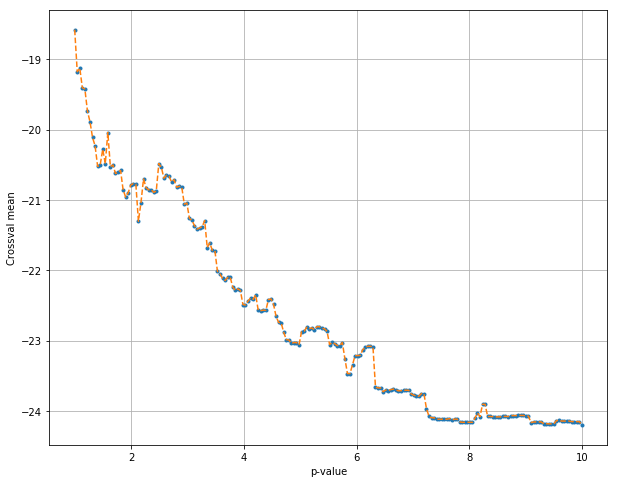

In [30]:
param = np.linspace(1, 10, 200)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf.split(x, y)

opt_rez = 0
k = 0
a_mean = []

for i in param:

    neigh = KNeighborsRegressor(weights='distance', n_neighbors=5, p=i)
#     neigh.fit(x, y) 
    
    a = cross_val_score(neigh, x, y, cv = kf, scoring='neg_mean_squared_error')
    a_mean.append(a.mean())
    if ( opt_rez < a.mean() ): 
        opt_rez = a.mean()
        k = i
print(opt_rez, k)  

plt.figure(figsize=(10, 8))
plt.grid(True)
plt.ylabel('Crossval mean')
plt.xlabel('p-value')
plt.plot(param, a_mean, '.')
plt.plot(param, a_mean, '--')

При каком p качество классификации оказалось максимальным?
1

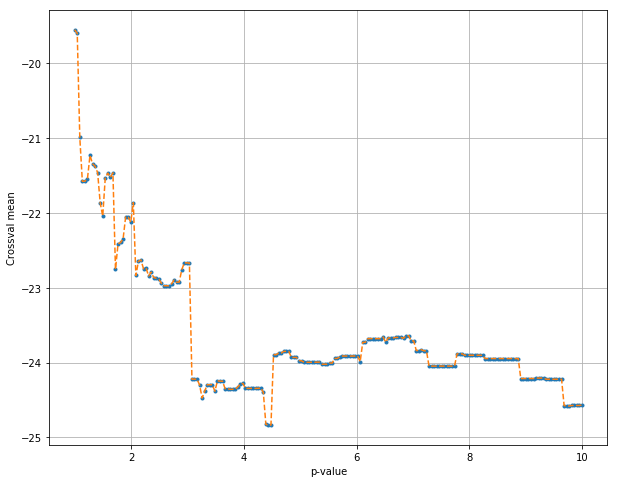

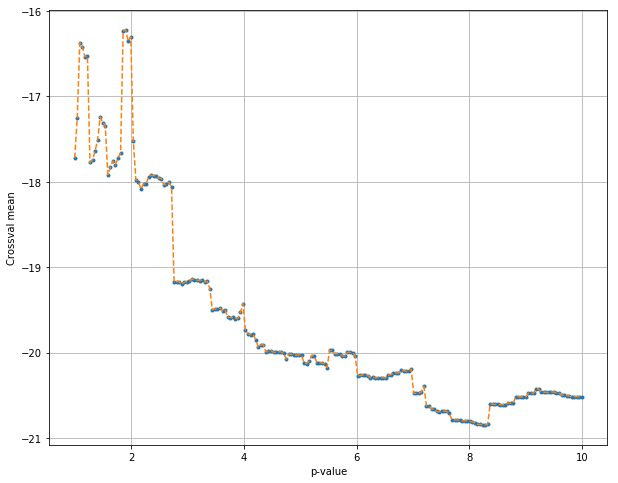

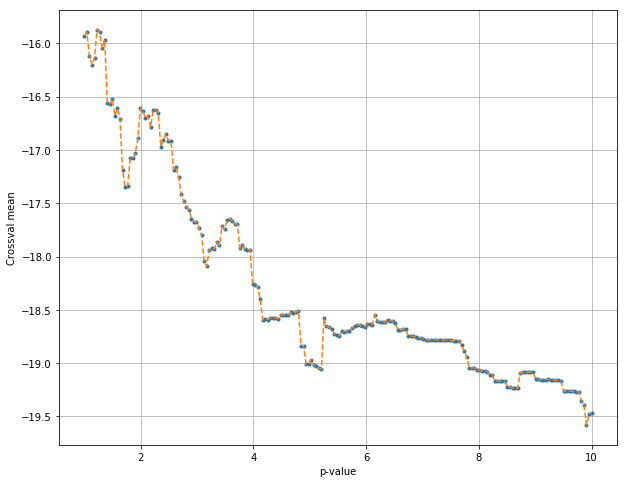

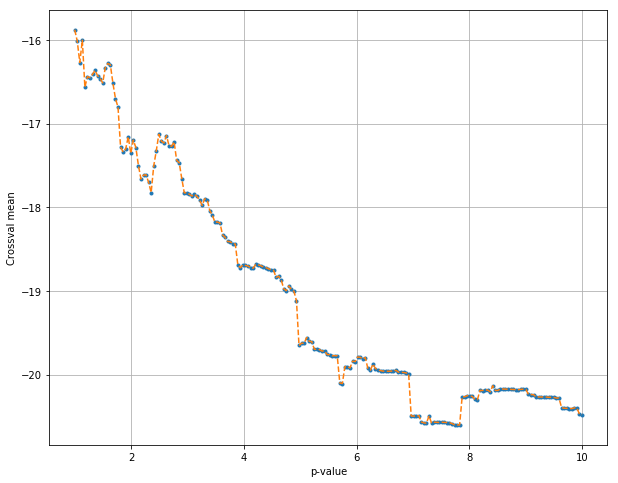

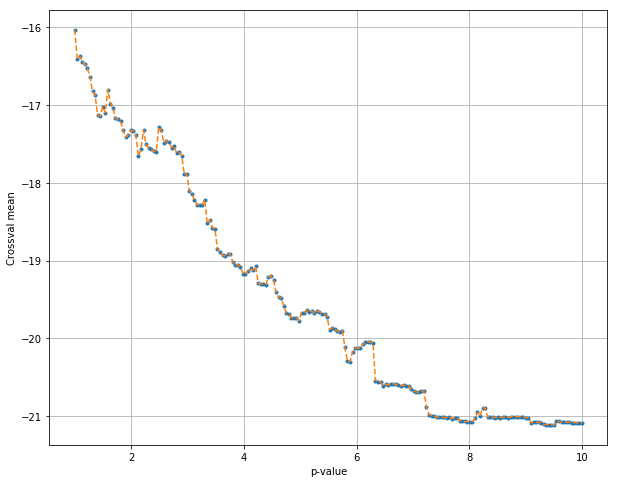

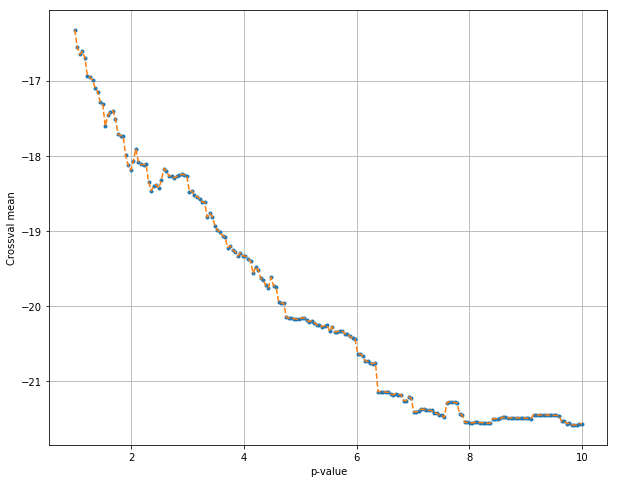

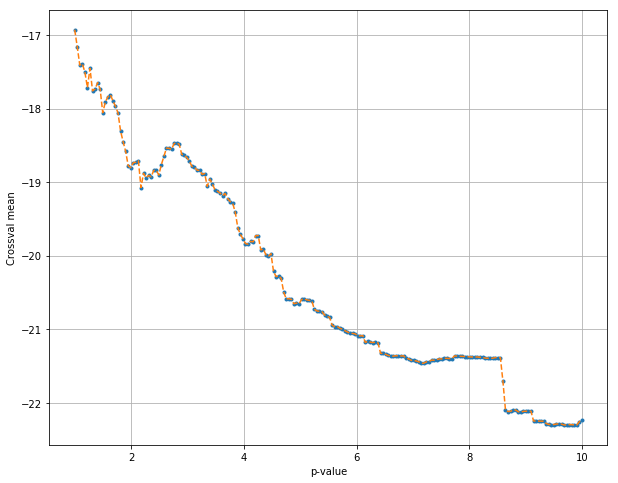

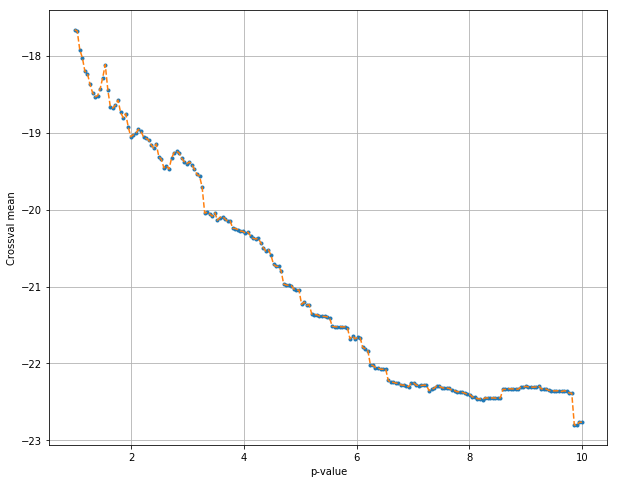

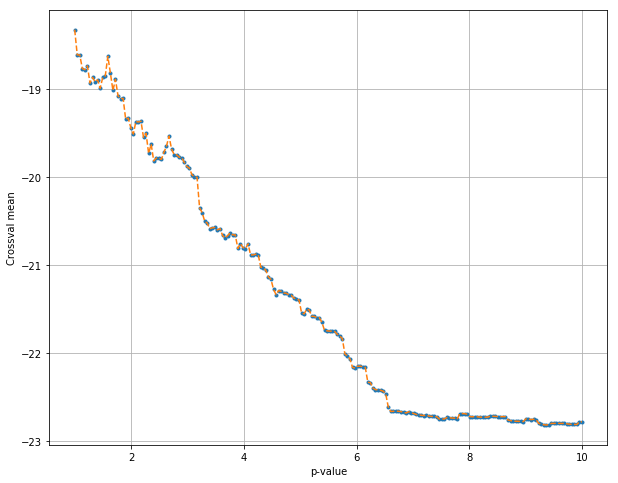

In [36]:
data = datasets.load_boston()

x = data.data
y = data.target

x = scale(x)

param = np.linspace(1, 10, 200)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf.split(x, y)

opt_rez = 0
k = 0


for j in range(1, 10):
    a_mean = []
    x = data.data
    y = data.target
    x = scale(x)
    for i in param:
        neigh = KNeighborsRegressor(weights='distance', n_neighbors=j, p=i)

        a = cross_val_score(neigh, x, y, cv = kf, scoring='neg_mean_squared_error')
        a_mean.append(a.mean())
        if ( opt_rez < a.mean() ): 
            opt_rez = a.mean()
            k = i

    plt.figure(figsize=(10, 8))
    plt.grid(True)
    plt.ylabel('Crossval mean')
    plt.xlabel('p-value')
    plt.plot(param, a_mean, '.')
    plt.plot(param, a_mean, '--')